# Формула Планка

$$u_\nu = \frac{8\pi h\nu^3}{c^3} \frac{1}{e^{h\nu/kT}-1}$$

In [6]:
from numpy import pi, exp, linspace
from scipy.constants import h, c, k

In [50]:
def planck(nu, T):
    return 8*pi*h*nu**3/c**3/(exp(h*nu/k/T) - 1)

In [111]:
nu = linspace(1e10, 1e15, 10000)

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

In [76]:
plt.style.use('~/.config/matplotlib/stylelib/my.talk.mplstyle')

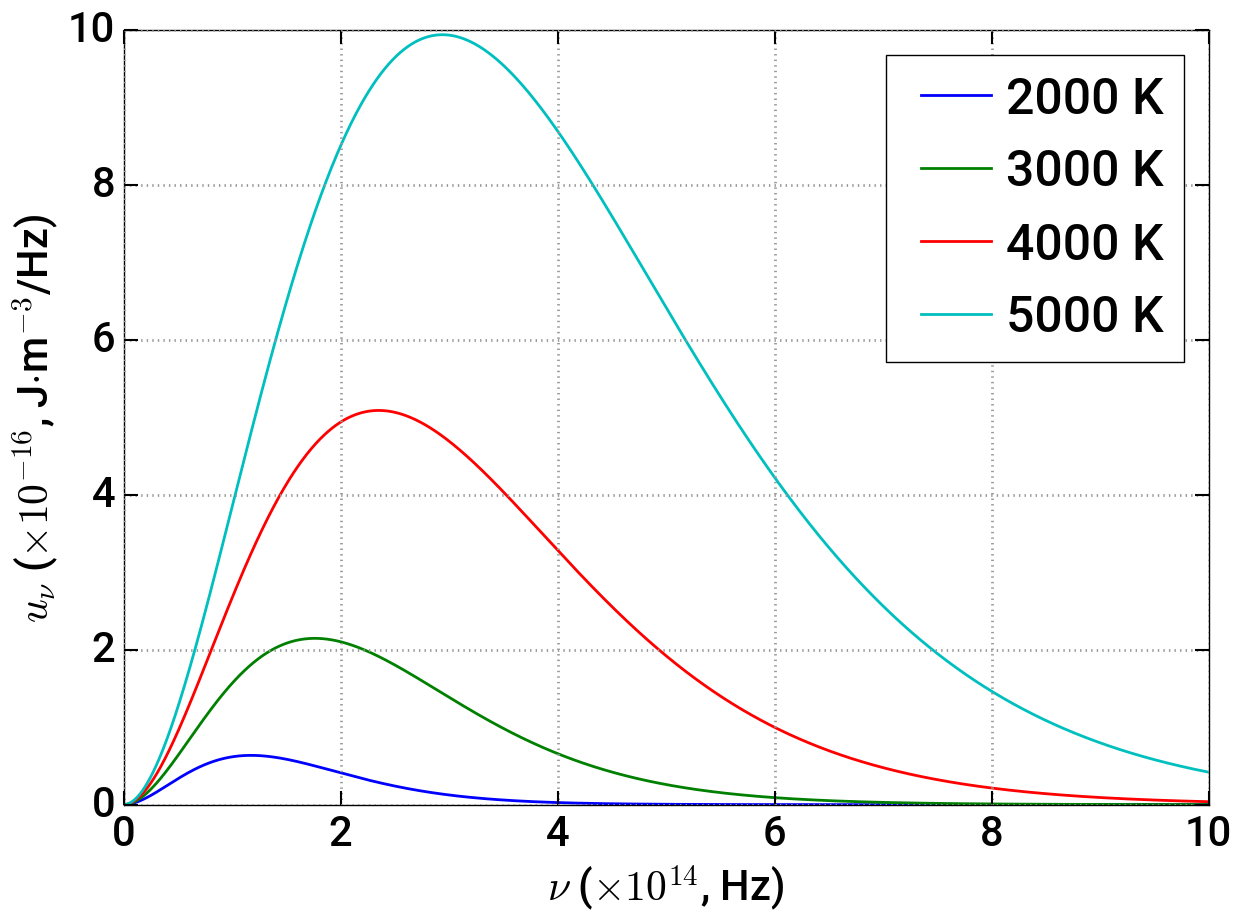

In [124]:
fig = plt.figure(figsize=(14, 10))

ax = fig.add_subplot(111)

for T in range(2000,5001,1000):
    ax.plot(nu/1e14, planck(nu, T)*1e16, label='{:4d} K'.format(T))

ax.legend()

ax.grid(True)

plt.xlabel('$\\nu$ ($\\times 10^{14}$, Hz)')
plt.ylabel('$u_{\\nu}$ ($\\times 10^{-16}$, J$\\cdot$m$^{-3}$/Hz)')

plt.savefig('/home/artem/projects/github/atomic-physics/img/blackbody-planck-frequency.png')

# Формула Планка для длин волн

$$u_\lambda = \frac{8\pi hc}{\lambda^5} \frac{1}{e^{hc/\lambda kT}-1}$$

In [85]:
def planck_l(l, T):
    return 8*pi*h*c/l**5/(exp(h*c/l/k/T) - 1)

In [101]:
l = linspace(1e-7, 3e-6, 10000)

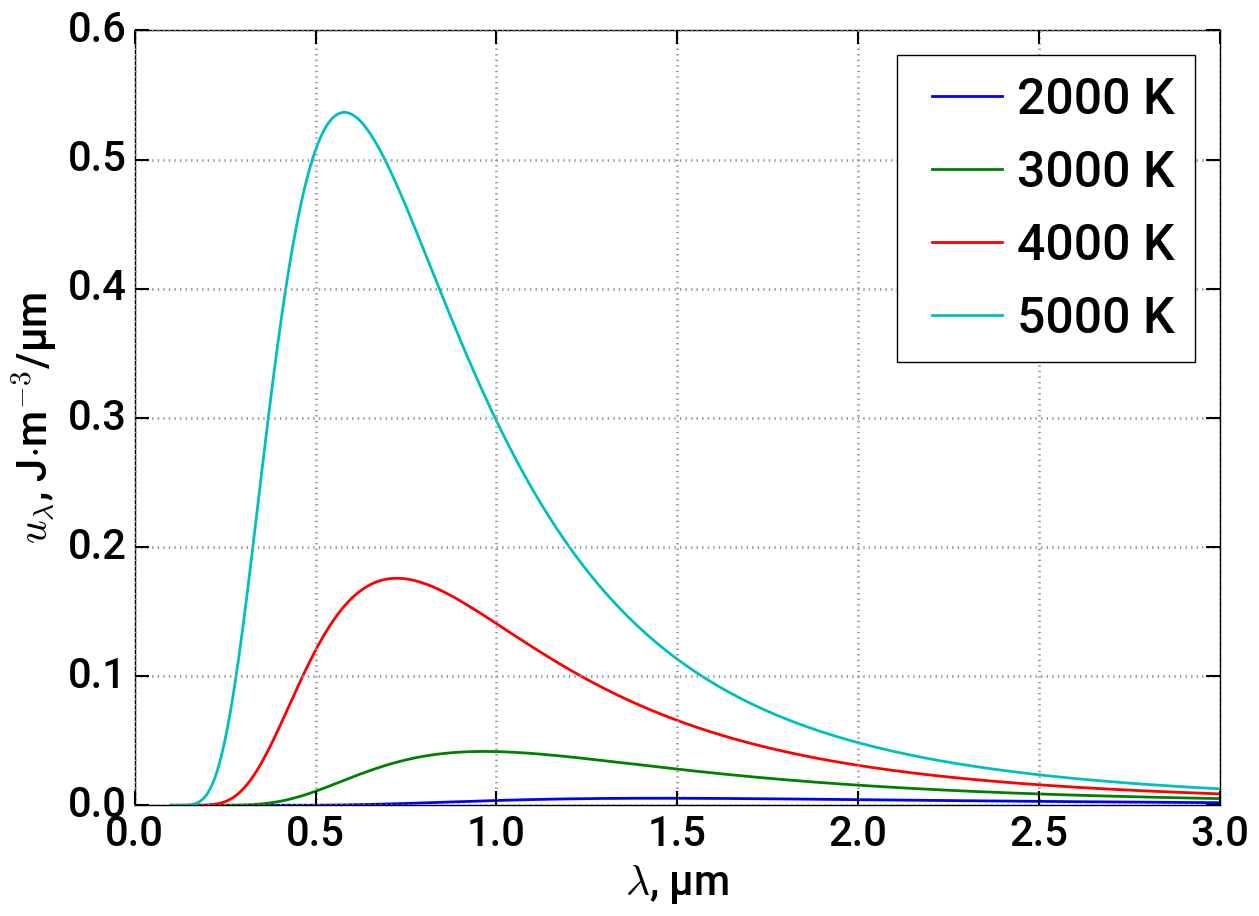

In [108]:
fig = plt.figure(figsize=(14, 10))

ax = fig.add_subplot(111)

for T in range(2000,5001,1000):
    ax.plot(l*1e6, planck_l(l, T)*1e-6, label='{:4d} K'.format(T))

ax.legend()

ax.grid(True)

plt.xlabel('$\\lambda$, µm')
plt.ylabel('$u_{\\lambda}$, J$\\cdot$m$^{-3}$/µm')

plt.savefig('/home/artem/projects/github/atomic-physics/img/blackbody-planck-wavelength.png')

# Сравнение распределений Планка, Вина и Рэлея — Джинса

## Распределение Вина

$$u_W = \frac{8\pi h\nu^3}{c^3} e^{-h\nu/kT}$$

## Распределение Рэлея — Джинса

$$u_{RD} = \frac{8\pi}{c^3}\nu^2kT$$

In [109]:
def wien(nu, T):
    return 8*pi*h*nu**3/c**3*exp(-h*nu/k/T)

In [110]:
def rd(nu, T):
    return 8*pi*nu**2/c**3*k*T

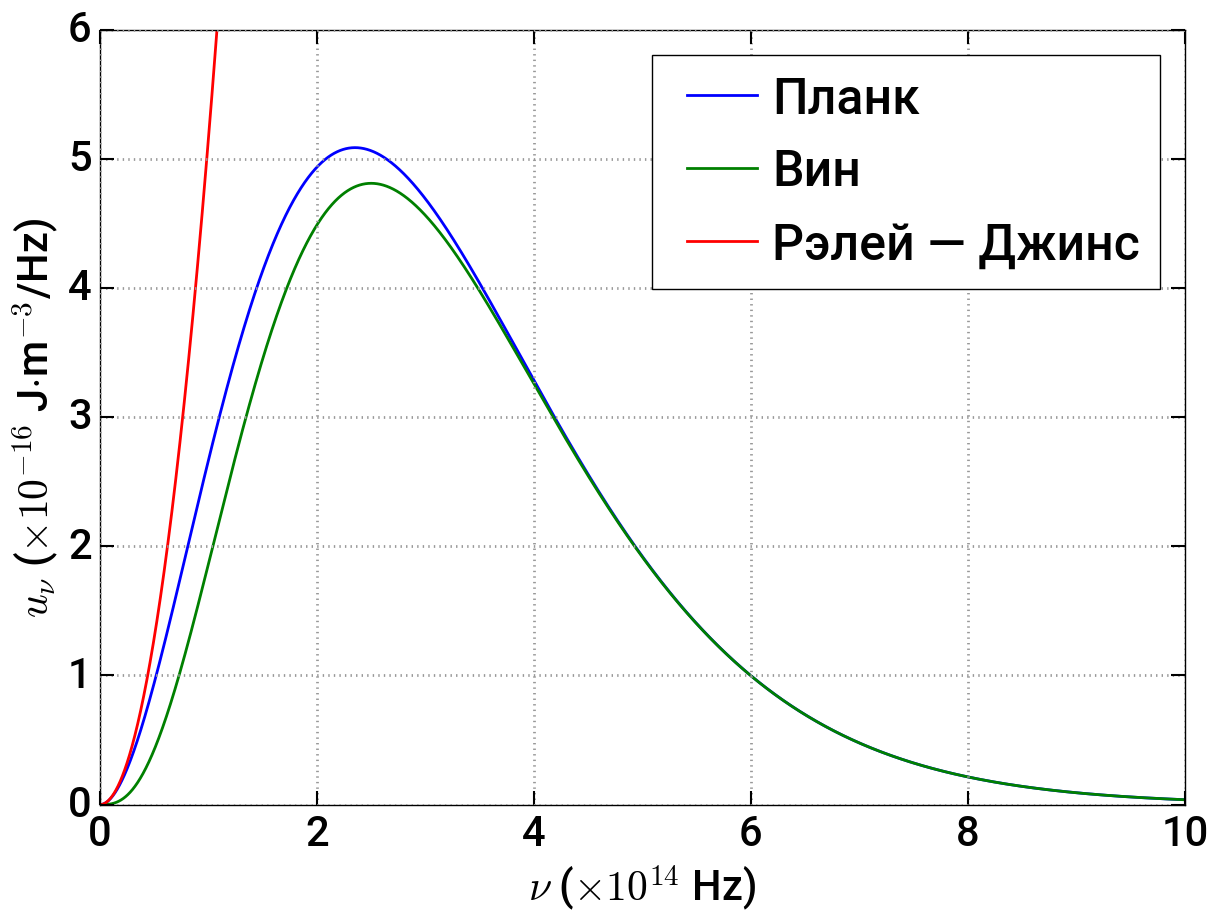

In [123]:
fig = plt.figure(figsize=(14, 10))

ax = fig.add_subplot(111)

ax.plot(nu/1e14, planck(nu, 4000)*1e16, label='Планк')
ax.plot(nu/1e14, wien(nu, 4000)*1e16, label='Вин')
ax.plot(nu/1e14, rd(nu, 4000)*1e16, label='Рэлей — Джинс')

plt.ylim(0,6)

ax.legend()

ax.grid(True)

plt.xlabel('$\\nu$ ($\\times 10^{14}$ Hz)')
plt.ylabel('$u_{\\nu}$ ($\\times 10^{-16}$ J$\\cdot$m$^{-3}$/Hz)')

plt.savefig('/home/artem/projects/github/atomic-physics/img/blackbody-comparison-4000K.png')